In [1]:
import pickle
infile = open("/content/cleaned df.pkl",'rb')
cleanedDF = pickle.load(infile)

In [2]:
cleanedDF

,company_profile,description,requirements,benefits,fraudulent
0,food52 weve created groundbreaking awardwinnin...,food52 fastgrowing james beard awardwinning on...,experience content management systems major pl...,experience content management systems major pl...,0
1,90 seconds worlds cloud video production servi...,organised focused vibrant awesomedo passion cu...,expect key responsibility communicate client 9...,expect key responsibility communicate client 9...,0
2,valor services provides workforce solutions me...,client located houston actively seeking experi...,implement precommissioning commissioning proce...,implement precommissioning commissioning proce...,0
3,passion improving quality life geography heart...,company esri environmental systems research in...,education bachelors masters gis business admin...,education bachelors masters gis business admin...,0
4,spot source solutions llc global human capital...,job title itemization review manager location ...,qualifications rn license state texas diploma ...,qualifications rn license state texas diploma ...,0
...,...,...,...,...,...
17866,Vend is looking for some awesome new talent to...,Just in case this is the first time youâ€™ve v...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0
17867,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting-Â Desire to have ...,Health &amp; WellnessMedical planPrescription ...,0
17868,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0
17869,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0


In [3]:
cleanedDF.fillna('', inplace = True)

cleanedDF["complete_posting"] = cleanedDF["company_profile"] + " " + cleanedDF["description"] + " " + cleanedDF["requirements"] + " " + cleanedDF["benefits"]

In [4]:
cleanedDF

,company_profile,description,requirements,benefits,fraudulent,complete_posting
0,food52 weve created groundbreaking awardwinnin...,food52 fastgrowing james beard awardwinning on...,experience content management systems major pl...,experience content management systems major pl...,0,food52 weve created groundbreaking awardwinnin...
1,90 seconds worlds cloud video production servi...,organised focused vibrant awesomedo passion cu...,expect key responsibility communicate client 9...,expect key responsibility communicate client 9...,0,90 seconds worlds cloud video production servi...
2,valor services provides workforce solutions me...,client located houston actively seeking experi...,implement precommissioning commissioning proce...,implement precommissioning commissioning proce...,0,valor services provides workforce solutions me...
3,passion improving quality life geography heart...,company esri environmental systems research in...,education bachelors masters gis business admin...,education bachelors masters gis business admin...,0,passion improving quality life geography heart...
4,spot source solutions llc global human capital...,job title itemization review manager location ...,qualifications rn license state texas diploma ...,qualifications rn license state texas diploma ...,0,spot source solutions llc global human capital...
...,...,...,...,...,...,...
17866,Vend is looking for some awesome new talent to...,Just in case this is the first time youâ€™ve v...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,Vend is looking for some awesome new talent to...
17867,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting-Â Desire to have ...,Health &amp; WellnessMedical planPrescription ...,0,WebLinc is the e-commerce platform and service...
17868,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,We Provide Full Time Permanent Positions for m...
17869,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,Nemsia Studios is looking for an experienced ...


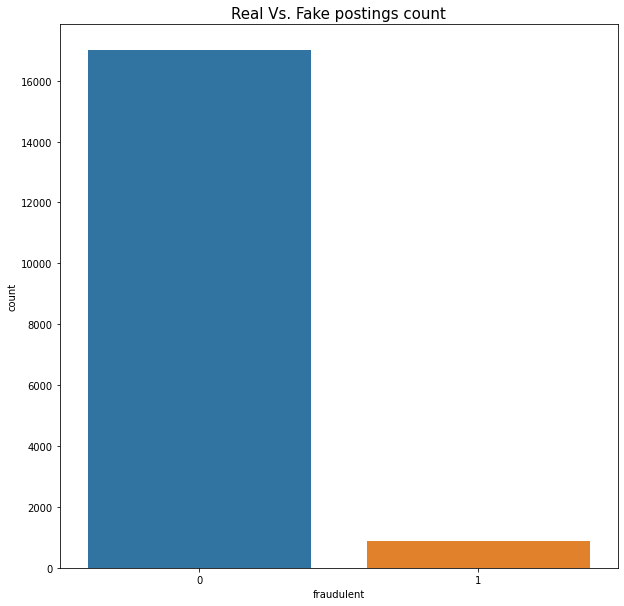

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))
sns.countplot(x="fraudulent", data=cleanedDF)
plt.title("Real Vs. Fake postings count", fontsize = 15)
plt.show()

In [ ]:
print("Number of cases: " , len(cleanedDF))
print("Number of fraudulent cases: ", len(cleanedDF[cleanedDF["fraudulent"] == 1]))

Number of cases:  17871
Number of fraudulent cases:  865


There is an extreme class imbalance. I will first split into an 80/20 train test split, and then I will re-examine the imbalance for the training set and upsample the fake postings.

In [5]:
from sklearn.model_selection import train_test_split

trainDF, testDF = train_test_split(cleanedDF, test_size=0.33, random_state = 1)



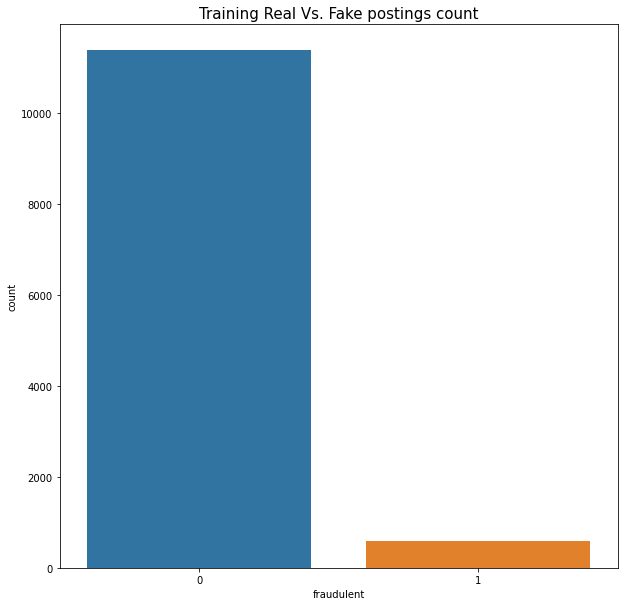

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(x="fraudulent", data=trainDF)
plt.title("Training Real Vs. Fake postings count", fontsize = 15)
plt.show()

In [6]:
print("Number of cases: " , len(trainDF))
print("Number of fraudulent cases: ", len(trainDF[trainDF["fraudulent"] == 1]))

Number of cases:  11973
Number of fraudulent cases:  594


In [7]:
from sklearn.utils import resample
import random
import pandas as pd
import math

random.seed(1)

df_majority = trainDF[trainDF["fraudulent"]==0]
df_minority = trainDF[trainDF["fraudulent"]==1]

negative_upsample = resample(df_minority, replace = True, 
                        n_samples = math.ceil(df_majority.shape[0]/2),
                        random_state = 101)

negative_undersample = resample(df_majority, replace = True, 
                        n_samples = math.ceil(df_majority.shape[0]/2),
                        random_state = 101)

df_upsampled = pd.concat([negative_undersample, negative_upsample])  # concat two data frames i,e majority class data set and upsampled minority class data set
df_upsampled = df_upsampled.sample(frac = 1, random_state = 101)

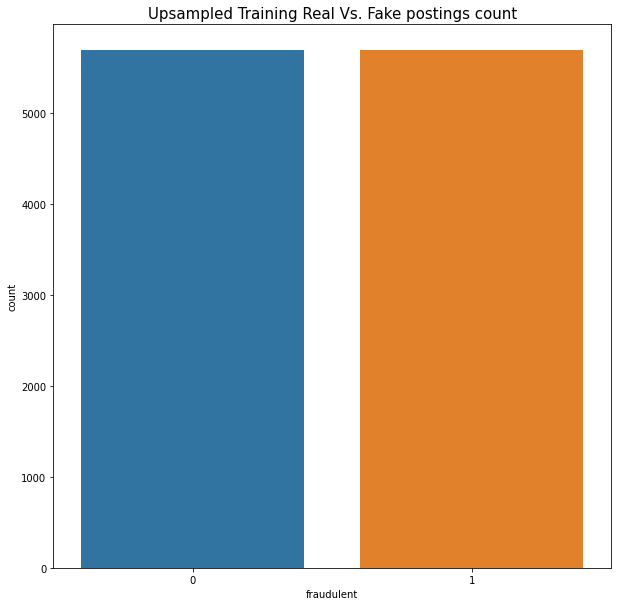

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(x="fraudulent", data=df_upsampled)
plt.title("Upsampled Training Real Vs. Fake postings count", fontsize = 15)
plt.show()

In [ ]:
print("Number of cases: " , len(df_upsampled))
print("Number of fraudulent cases: ", len(df_upsampled[df_upsampled["fraudulent"] == 1]))

Number of cases:  11380
Number of fraudulent cases:  5690


In [9]:
train_full = df_upsampled['complete_posting']

test_full = testDF['complete_posting']

trainY = df_upsampled['fraudulent']

testY = testDF['fraudulent']

# Bag of words and TFIDF NN

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()

train_count = vectorizer.fit_transform(train_full.values.astype('U')).toarray()
val_count = vectorizer.transform(test_full.values.astype('U')).toarray()


In [ ]:
train_count.shape

(11380, 51797)

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):

    # layer 1 : input layer
    inp = tf.keras.Input((X.shape[1],))

    # layer 2 : add the dense layer with 128 units and relu activation
    x = tf.keras.layers.Dense(128, input_dim = X.shape[1] , activation = 'relu')(inp)  

    # layer 3 : add the dropout layer with dropout rate of 0.75
    x = tf.keras.layers.Dropout(rate=0.75)(x) 

    # layer 4 : add the dense layer with 32 units with tanh activation and with l2 regularization
    x = tf.keras.layers.Dense(32, activation = 'tanh', kernel_regularizer='l2')(x)

    # layer 5 : add the dropout layer with dropout rate of 0.75
    x = tf.keras.layers.Dropout(rate=0.75)(x)

    # layer 6 : add the dense layer with 8 units with tanh activation and with l2 regularization
    x = tf.keras.layers.Dense(8,activation = 'tanh', kernel_regularizer='l2')(x)

    # layer 7 : add the dropout layer with dropout rate of 0.75
    x = tf.keras.layers.Dropout(rate=0.75)(x)



    # TO DO Final layer : add output layer and activation 
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    # TO DO : use a loss function, optimizer as adam to compile 
    # and evaluate model on auc,precision,recall,accuracy
    # HINT : choose your loss function based on the task (binary classification)

    model = tf.keras.models.Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'Precision', 'Recall', 'accuracy'])

  
    return model

  


In [ ]:
model = build_model(train_count)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 51797)]           0         
                                                                 
 dense (Dense)               (None, 128)               6630144   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0     

In [ ]:
count_model = model.fit(train_count, trainY, epochs=10, batch_size = 64, validation_data=(val_count, testY)) 

Epoch 1/10
178/178 [==============================] - 12s 60ms/step - loss: 0.9641 - auc: 0.7662 - precision: 0.6750 - recall: 0.7228 - accuracy: 0.6874 - val_loss: 0.4766 - val_auc: 0.9729 - val_precision: 0.4646 - val_recall: 0.8708 - val_accuracy: 0.9479
Epoch 2/10
178/178 [==============================] - 10s 55ms/step - loss: 0.4870 - auc: 0.9572 - precision: 0.8455 - recall: 0.9341 - accuracy: 0.8817 - val_loss: 0.2387 - val_auc: 0.9796 - val_precision: 0.6839 - val_recall: 0.8303 - val_accuracy: 0.9746
Epoch 3/10
178/178 [==============================] - 10s 55ms/step - loss: 0.2882 - auc: 0.9869 - precision: 0.8937 - recall: 0.9851 - accuracy: 0.9339 - val_loss: 0.1578 - val_auc: 0.9785 - val_precision: 0.7372 - val_recall: 0.7970 - val_accuracy: 0.9776
Epoch 4/10
178/178 [==============================] - 11s 59ms/step - loss: 0.2105 - auc: 0.9910 - precision: 0.9029 - recall: 0.9931 - accuracy: 0.9431 - val_loss: 0.1258 - val_auc: 0.9803 - val_precision: 0.7276 - val_recall

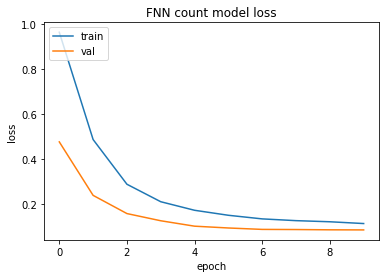

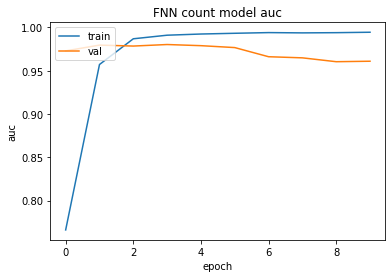

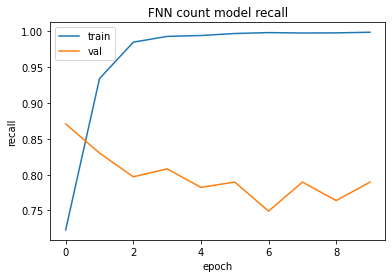

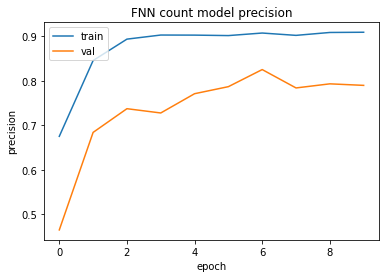

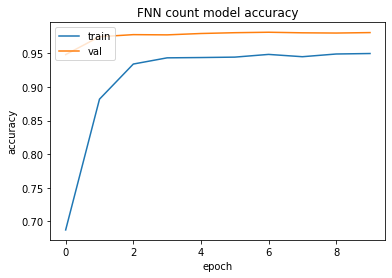

In [ ]:
####################################
# PLOT :                           #
# train loss vs val loss           #
# train auc vs val auc             #
# train recall vs val recall       #
# train precision vs val precision #
# train accuracy vs val accuracy   #
####################################


import matplotlib.pyplot as plt


plt.plot(count_model.history['loss'])
plt.plot(count_model.history['val_loss'])
plt.title('FNN count model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(count_model.history['auc'])
plt.plot(count_model.history['val_auc'])
plt.title('FNN count model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(count_model.history['recall'])
plt.plot(count_model.history['val_recall'])
plt.title('FNN count model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(count_model.history['precision'])
plt.plot(count_model.history['val_precision'])
plt.title('FNN count model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(count_model.history['accuracy'])
plt.plot(count_model.history['val_accuracy'])
plt.title('FNN count model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



In [ ]:
vectorizer = TfidfVectorizer()

train_tfidf = vectorizer.fit_transform(train_full.values.astype('U')).toarray()
val_tfidf = vectorizer.transform(test_full.values.astype('U')).toarray()

In [ ]:
model2 = build_model(train_tfidf)

model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 51797)]           0         
                                                                 
 dense_4 (Dense)             (None, 128)               6630144   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 264       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0   

In [ ]:
tfidf_model = model.fit(train_tfidf, trainY, epochs=5, batch_size = 128, validation_data=(val_tfidf, testY)) 

Epoch 1/5
89/89 [==============================] - 9s 88ms/step - loss: 0.2136 - auc: 0.9940 - precision: 0.9059 - recall: 0.9982 - accuracy: 0.9473 - val_loss: 0.1113 - val_auc: 0.9853 - val_precision: 0.8766 - val_recall: 0.7601 - val_accuracy: 0.9841
Epoch 2/5
89/89 [==============================] - 7s 75ms/step - loss: 0.1714 - auc: 0.9944 - precision: 0.9523 - recall: 0.9394 - accuracy: 0.9461 - val_loss: 0.1062 - val_auc: 0.9860 - val_precision: 0.8625 - val_recall: 0.7638 - val_accuracy: 0.9836
Epoch 3/5
89/89 [==============================] - 7s 84ms/step - loss: 0.1600 - auc: 0.9948 - precision: 0.9172 - recall: 0.9817 - accuracy: 0.9466 - val_loss: 0.1050 - val_auc: 0.9859 - val_precision: 0.8154 - val_recall: 0.7823 - val_accuracy: 0.9819
Epoch 4/5
89/89 [==============================] - 7s 75ms/step - loss: 0.1488 - auc: 0.9952 - precision: 0.9988 - recall: 0.8995 - accuracy: 0.9492 - val_loss: 0.0998 - val_auc: 0.9844 - val_precision: 0.8123 - val_recall: 0.7823 - val_a

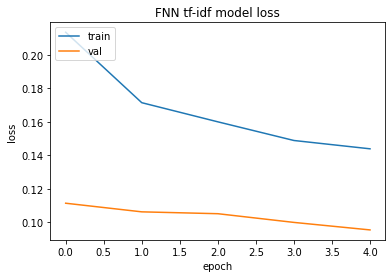

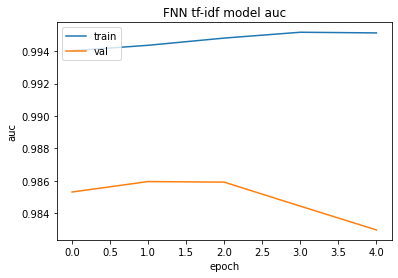

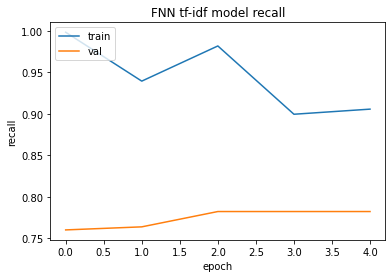

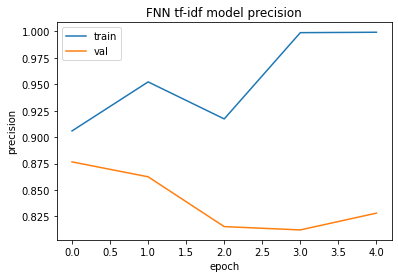

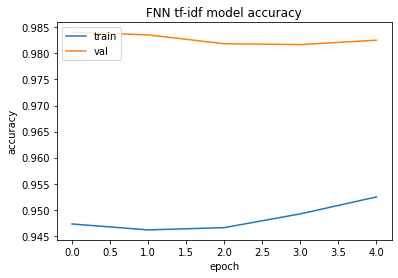

In [ ]:
####################################
# PLOT :                           #
# train loss vs val loss           #
# train auc vs val auc             #
# train recall vs val recall       #
# train precision vs val precision #
# train accuracy vs val accuracy   #
####################################


import matplotlib.pyplot as plt


plt.plot(tfidf_model.history['loss'])
plt.plot(tfidf_model.history['val_loss'])
plt.title('FNN tf-idf model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(tfidf_model.history['auc'])
plt.plot(tfidf_model.history['val_auc'])
plt.title('FNN tf-idf model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(tfidf_model.history['recall'])
plt.plot(tfidf_model.history['val_recall'])
plt.title('FNN tf-idf model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(tfidf_model.history['precision'])
plt.plot(tfidf_model.history['val_precision'])
plt.title('FNN tf-idf model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(tfidf_model.history['accuracy'])
plt.plot(tfidf_model.history['val_accuracy'])
plt.title('FNN tf-idf model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



# Word Embedding Neural Network

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_full)

word_index = tokenizer.word_index
vocabulary = list(word_index.keys())

train_sequences = tokenizer.texts_to_sequences(train_full)
test_sequences = tokenizer.texts_to_sequences(test_full)

train_padded = pad_sequences(train_sequences, maxlen=200)
test_padded = pad_sequences(test_sequences, maxlen=200)

In [11]:
import numpy as np

glove_dictionary = {}


with open('glove.6B.200d.txt') as file:
    for each_line in file:
        words_in_line, coeff_cients = each_line.split(maxsplit=1)
        coeff_cients = np.array(coeff_cients.split(),dtype = float)
        glove_dictionary[words_in_line] = coeff_cients

In [12]:
embedding_matrix = np.zeros((len(vocabulary)+1, 200))

for word, index in word_index.items():
  embedding_vector = glove_dictionary.get(word)
  if not embedding_vector is None:
    embedding_matrix[index, :] = embedding_vector

In [14]:
embedding_matrix.shape

(51836, 200)

In [13]:
import tensorflow as tf

tf.random.set_seed(42)

def build_model(embedding_matrix):

  inp = tf.keras.Input(shape=(None,), dtype="int32")

  x = tf.keras.layers.Embedding(embedding_matrix.shape[0]+1, 64)(inp)

  x = tf.keras.layers.Dropout(rate=0.75)(x)
  x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16))(x)

  x = tf.keras.layers.Dropout(rate=0.75)(x)
  x = tf.keras.layers.Dense(4,activation = 'tanh', kernel_regularizer='l2')(x)
  x = tf.keras.layers.Dropout(rate=0.75)(x)

  x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

  model = tf.keras.models.Model(inputs=inp, outputs=x)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'Precision', 'Recall', 'accuracy'])

  
  return model

In [15]:
model = build_model(embedding_matrix)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 64)          3317568   
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 32)               10368     
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 4)                 132       
                                                             

In [16]:
pad_model = model.fit(train_padded, trainY, epochs=5, batch_size = 64, validation_data=(test_padded, testY)) 

Epoch 1/5
178/178 [==============================] - 30s 143ms/step - loss: 0.6801 - auc: 0.6967 - precision: 0.5896 - recall: 0.8047 - accuracy: 0.6223 - val_loss: 0.4228 - val_auc: 0.9079 - val_precision: 0.2239 - val_recall: 0.8376 - val_accuracy: 0.8591
Epoch 2/5
178/178 [==============================] - 24s 137ms/step - loss: 0.4823 - auc: 0.8935 - precision: 0.7193 - recall: 0.9518 - accuracy: 0.7902 - val_loss: 0.2456 - val_auc: 0.9406 - val_precision: 0.5088 - val_recall: 0.7491 - val_accuracy: 0.9552
Epoch 3/5
178/178 [==============================] - 24s 135ms/step - loss: 0.3676 - auc: 0.9283 - precision: 0.7455 - recall: 0.9775 - accuracy: 0.8219 - val_loss: 0.1675 - val_auc: 0.9233 - val_precision: 0.6246 - val_recall: 0.6937 - val_accuracy: 0.9668
Epoch 4/5
178/178 [==============================] - 24s 135ms/step - loss: 0.3601 - auc: 0.9229 - precision: 0.8397 - recall: 0.7592 - accuracy: 0.8071 - val_loss: 0.2680 - val_auc: 0.9109 - val_precision: 0.3248 - val_recall

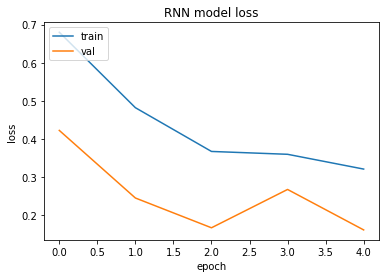

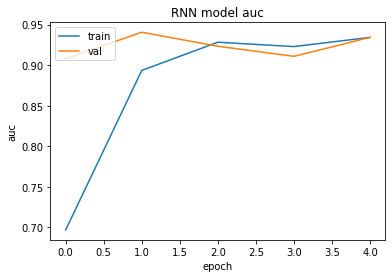

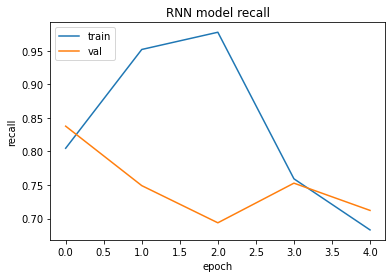

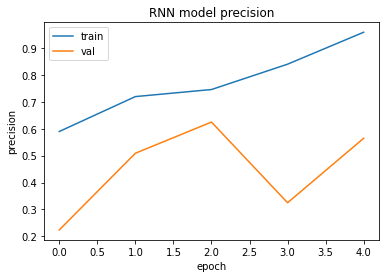

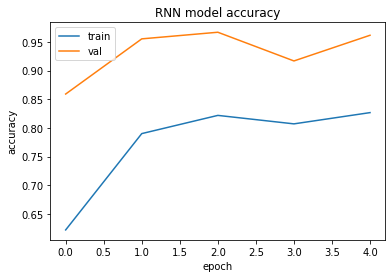

In [17]:
####################################
# PLOT :                           #
# train loss vs val loss           #
# train auc vs val auc             #
# train recall vs val recall       #
# train precision vs val precision #
# train accuracy vs val accuracy   #
####################################


import matplotlib.pyplot as plt


plt.plot(pad_model.history['loss'])
plt.plot(pad_model.history['val_loss'])
plt.title('RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(pad_model.history['auc'])
plt.plot(pad_model.history['val_auc'])
plt.title('RNN model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(pad_model.history['recall'])
plt.plot(pad_model.history['val_recall'])
plt.title('RNN model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(pad_model.history['precision'])
plt.plot(pad_model.history['val_precision'])
plt.title('RNN model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(pad_model.history['accuracy'])
plt.plot(pad_model.history['val_accuracy'])
plt.title('RNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



In [18]:
def build_model():
    model = tf.keras.models.Sequential()
    
    # embedding layer
    embedding_layer = tf.keras.layers.Embedding(len(vocabulary)+1, 200, weights=[embedding_matrix], input_length=200 , trainable=False)
    model.add(embedding_layer)
    
    # CNN
    model.add(tf.keras.layers.Conv1D(128, 1, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.75))
    model.add(tf.keras.layers.GlobalMaxPooling1D())
    model.add(tf.keras.layers.Dropout(rate=0.75))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'Precision', 'Recall', 'accuracy'])
    
    return model 

In [19]:
model = build_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 200)          10367200  
                                                                 
 conv1d (Conv1D)             (None, 200, 128)          25728     
                                                                 
 dropout_3 (Dropout)         (None, 200, 128)          0         
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                        

In [20]:
pad__cov_model = model.fit(train_padded, trainY, epochs=5, batch_size = 64, validation_data=(test_padded, testY)) 

Epoch 1/5
178/178 [==============================] - 9s 46ms/step - loss: 1.9201 - auc: 0.5991 - precision: 0.5838 - recall: 0.5747 - accuracy: 0.5825 - val_loss: 0.5104 - val_auc: 0.8894 - val_precision: 0.1886 - val_recall: 0.7675 - val_accuracy: 0.8376
Epoch 2/5
178/178 [==============================] - 8s 45ms/step - loss: 0.7308 - auc: 0.7619 - precision: 0.6984 - recall: 0.6921 - accuracy: 0.6966 - val_loss: 0.5076 - val_auc: 0.9183 - val_precision: 0.2288 - val_recall: 0.8155 - val_accuracy: 0.8652
Epoch 3/5
178/178 [==============================] - 9s 51ms/step - loss: 0.5375 - auc: 0.8263 - precision: 0.7557 - recall: 0.7568 - accuracy: 0.7561 - val_loss: 0.4983 - val_auc: 0.9289 - val_precision: 0.2520 - val_recall: 0.8192 - val_accuracy: 0.8800
Epoch 4/5
178/178 [==============================] - 9s 49ms/step - loss: 0.4643 - auc: 0.8664 - precision: 0.7907 - recall: 0.7900 - accuracy: 0.7904 - val_loss: 0.5084 - val_auc: 0.9351 - val_precision: 0.2275 - val_recall: 0.8487

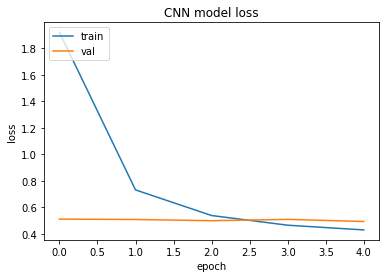

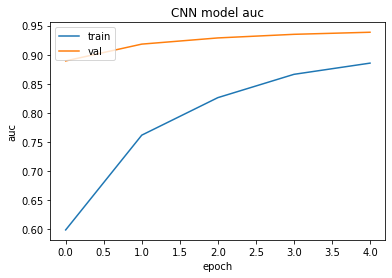

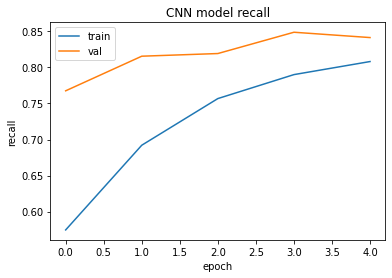

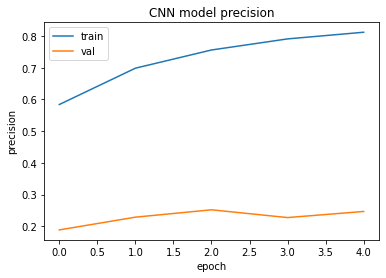

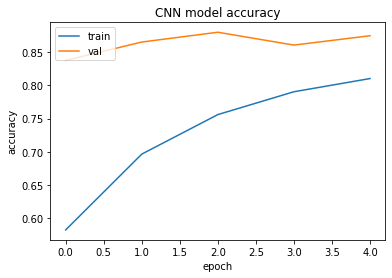

In [21]:
####################################
# PLOT :                           #
# train loss vs val loss           #
# train auc vs val auc             #
# train recall vs val recall       #
# train precision vs val precision #
# train accuracy vs val accuracy   #
####################################


import matplotlib.pyplot as plt


plt.plot(pad__cov_model.history['loss'])
plt.plot(pad__cov_model.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(pad__cov_model.history['auc'])
plt.plot(pad__cov_model.history['val_auc'])
plt.title('CNN model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(pad__cov_model.history['recall'])
plt.plot(pad__cov_model.history['val_recall'])
plt.title('CNN model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(pad__cov_model.history['precision'])
plt.plot(pad__cov_model.history['val_precision'])
plt.title('CNN model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(pad__cov_model.history['accuracy'])
plt.plot(pad__cov_model.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

